In [5]:
# This notebook demostrates how to load, preprocess, and model the Heart Disease dataset using Logistic Regression

# Step 1: Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset

df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Step 3: Check for missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Step 4: Feature and target separation

X = df.drop('target', axis=1)
y = df['target']

Accuracy: 0.7951219512195122


Classification Report
              precision  recall  f1-score  support
0                  0.85    0.72      0.78    102.0
1                  0.76    0.87      0.81    103.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.80    0.79      0.79    205.0
weighted avg       0.80    0.80      0.79    205.0
Confution Matrix: [[73 29]
 [13 90]]


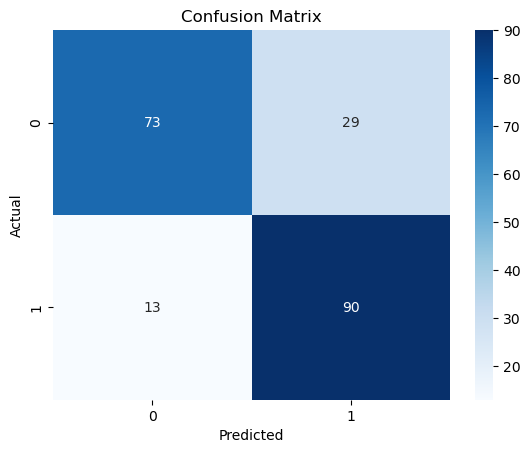

In [28]:
# Step 5: Train-test-Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Step 6: Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the Logistic Regression model

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 8: Make Predictions

y_pred = model.predict(X_test_scaled)

# Step 9: Evaluate the model

print('Accuracy:', accuracy_score(y_test, y_pred))
# Generate the classification report as a dictionary
report_dict = classification_report(y_test,y_pred, output_dict=True)
# Convert the dictionary into a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()
# Round for better readability
report_df = report_df.round(2)
# Display the DataFrame
print('\n')
print('Classification Report')
print(report_df)

print('Confution Matrix:',confusion_matrix(y_test, y_pred))

# Step 10: Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()